In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 8)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# df.loc[df['Chance of Admit '] < 0.75, 'Chance of Admit '] = 0
# df.loc[df['Chance of Admit '] >= 0.75, 'Chance of Admit '] = 1
# df

<Axes: >

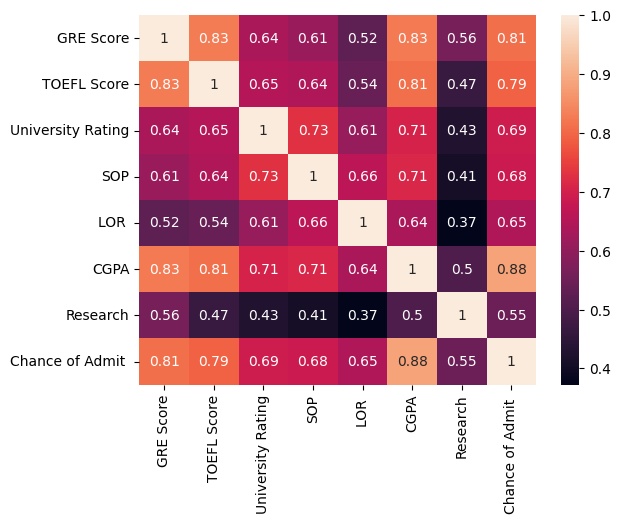

In [9]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

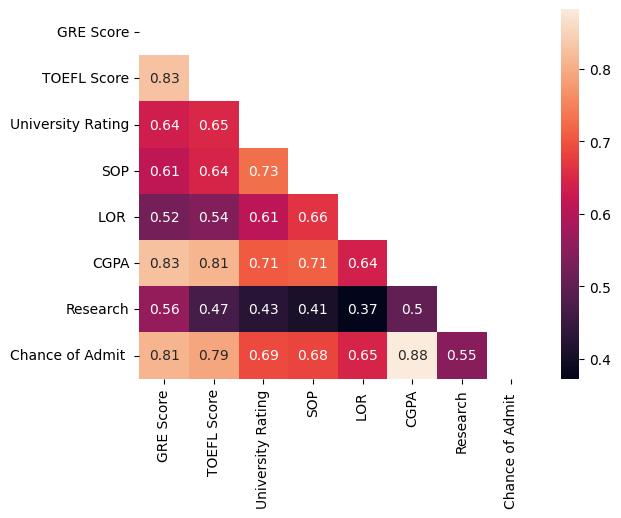

In [24]:
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
model=LinearRegression()
X=df.iloc[:,0:1]
y=df.iloc[:,7:8]


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [13]:
X_train

,GRE Score
283,321
81,340
370,310
0,337
456,299
...,...
241,317
253,335
390,314
155,312


In [14]:
y_train

,Chance of Admit
283,0.80
81,0.96
370,0.72
0,0.92
456,0.51
...,...
241,0.65
253,0.93
390,0.64
155,0.77


In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
X_test

,GRE Score
475,300
385,335
167,313
40,308
350,318
...,...
376,297
317,300
466,314
252,318


In [18]:
y_pred

array([[0.55185268],
       [0.90733461],
       [0.68388882],
       [0.63310569],
       [0.73467196],
       [0.68388882],
       [0.75498521],
       [0.81592497],
       [0.76514184],
       [0.5213828 ],
       [0.66357557],
       [0.8260816 ],
       [0.65341894],
       [0.93780449],
       [0.79561172],
       [0.6737322 ],
       [0.62294907],
       [0.85655148],
       [0.70420208],
       [0.76514184],
       [0.81592497],
       [0.89717798],
       [0.68388882],
       [0.8667081 ],
       [0.6737322 ],
       [0.56200931],
       [0.66357557],
       [0.77529846],
       [0.81592497],
       [0.58232256],
       [0.66357557],
       [0.56200931],
       [0.8260816 ],
       [0.66357557],
       [0.48075629],
       [0.79561172],
       [0.74482858],
       [0.60263581],
       [0.74482858],
       [0.77529846],
       [0.6737322 ],
       [0.76514184],
       [0.55185268],
       [0.83623822],
       [0.69404545],
       [0.85655148],
       [0.64326232],
       [0.765

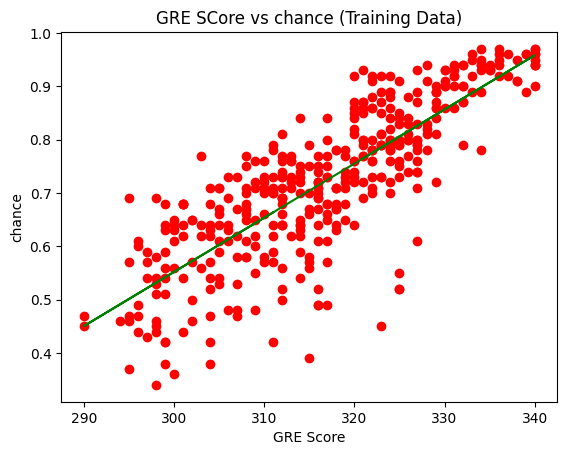

In [19]:
plt.scatter(X_train, y_train, color='Red')
plt.plot(X_train, model.predict(X_train), color='Green')
plt.title('GRE SCore vs chance (Training Data)')
plt.xlabel('GRE Score')
plt.ylabel('chance')
plt.show()

In [20]:
print(f'a0 = {model.intercept_}')
print(f'a1 = {model.coef_}')

a0 = [-2.49513531]
a1 = [[0.01015663]]


In [21]:
print("Linear regression mse:",metrics.mean_absolute_error(y_test,y_pred))

Linear regression mse: 0.06251734991896006
